In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k

In [2]:
file_name2="D:\\Work set\\Part-1 - Plant Seedling Classification Data-20210514T160322Z-001.zip"

In [3]:
##########################################################################  
# Function that streams out the entire X_train and y_train kind of mechanism
##########################################################################  
def figure_out_zip2(zip_file_path):
    out_list=[]
    labels=[]
    backup=[] # Not used here but can be used later on future for reference and cross checking
    from zipfile import ZipFile
    import numpy as np
    from PIL import Image
    from io import BytesIO
    import cv2 as cv
    ####################################################
    ####################################################
    file_name=zip_file_path
    myfile=ZipFile(file_name,'r')
    images=np.array([])
    #image_name_list=myfile.infolist().filename
    for each in myfile.infolist():
        try:
            file_temp=each.filename.split("/")
            #print(each.filename)
            img=Image.open(BytesIO(myfile.read(each.filename)))
            backup.append(file_temp[-1])
            labels.append(file_temp[-2])
            img=np.array(img)
            #plt.imshow(img)
            #print(img.shape)
            #images=np.append(images,img)
            out_list.append(img)
        except:
            print("Invalid file type",file_temp[-1])
    #print(images.shape)
    myfile.close()
    return out_list,np.array(labels) #,backup - Uncomment this to collect the file names for cross reference lateron.
##########################################################################      
# End of Function   
##########################################################################  

In [4]:
photos2,labels2=figure_out_zip2(file_name2)

Invalid file type .DS_Store


In [5]:
np.unique(labels2)

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Seedling - Prediction', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [6]:
photos2[1].shape

(63, 63, 3)

In [7]:
length_tuples=[]
for each in photos2:
    length_tuples.append(each.shape)

In [8]:
temp=pd.DataFrame(length_tuples,index=range(len(length_tuples)))

In [9]:
index_temp=temp[temp[2]==temp[2].max()].index

In [10]:
index_temp[1]

780

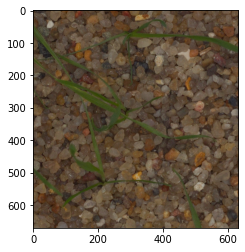

In [11]:
plt.imshow(photos2[index_temp[1]])

In [12]:
from skimage.transform import resize
photos_resized=[]
for each in photos2:
    photos_resized.append(resize(photos2[index_temp[1]],(64,64)))

Now, we have our pictures in a uniform size i.e. 64x64x4 and another viz. the labels given by labels2.


We are going to use three supervise machine learning algorithms here. 1. KNN 2. Logistic Regression 3. SVM

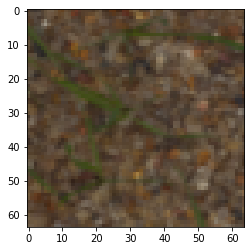

In [13]:
plt.imshow(photos_resized[21])

In [14]:
np.array(photos_resized).shape

(4768, 64, 64, 4)

In [15]:
print(photos_resized[21])
photos_resized[21].reshape(-1)

[[[0.29427083 0.22413282 0.16151961 1.        ]
  [0.26366685 0.22120098 0.19148548 1.        ]
  [0.25310896 0.21781485 0.19595588 1.        ]
  ...
  [0.39696691 0.29915676 0.2096201  1.        ]
  [0.41142506 0.31730742 0.22120098 1.        ]
  [0.39943919 0.30980392 0.21960784 1.        ]]

 [[0.34852678 0.27625613 0.20566789 1.        ]
  [0.34990809 0.29470765 0.23819676 1.        ]
  [0.34598652 0.29177174 0.24774601 1.        ]
  ...
  [0.39146968 0.29824051 0.21657475 1.        ]
  [0.39822304 0.30802696 0.21871936 1.        ]
  [0.36075368 0.27840074 0.19604779 1.        ]]

 [[0.32991656 0.24601716 0.16871936 1.        ]
  [0.33932507 0.27696078 0.2231924  1.        ]
  [0.34028799 0.28993925 0.25072357 1.        ]
  ...
  [0.38887868 0.3043694  0.23619433 1.        ]
  [0.34004289 0.24871324 0.17925858 1.        ]
  [0.32827819 0.2526348  0.17925858 1.        ]]

 ...

 [[0.4385869  0.36470588 0.27172181 1.        ]
  [0.42613358 0.34808302 0.2614277  1.        ]
  [0.41594

array([0.29427083, 0.22413282, 0.16151961, ..., 0.28409926, 0.22745098,
       1.        ])

In [16]:
x=np.array(photos_resized)
y=np.array(labels2)
x=x.reshape(x.shape[0],-1)

In [17]:
print("The Shapes of the new data are : ",x.shape,y.shape) # Note here that each picture of the standard size is now reduced to 

The Shapes of the new data are :  (4768, 16384) (4768,)


In [18]:
######################################################################
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
#from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as area_under_curve
######################################################################

support_vector = SVC(C=10000,probability=True)
LR_model = LogisticRegression(solver="liblinear")
KNN = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance')

###########################################################################
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [19]:
x_train.shape #Checking for reference.

(3814, 16384)


Logistic Regression Model Score for Train Set :  0.13791295228106976

Logistic Regression Model Score for Test Set :  0.1519916142557652

Logistic Regression Mapping


<AxesSubplot:>

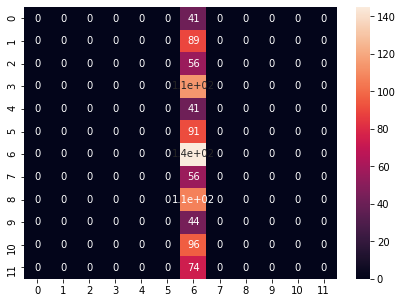

In [20]:
######################################################################
# Logistic Regression
######################################################################
LR_model.fit(x_train,y_train)
predict_LR = LR_model.predict(x_test)
####################################################
Accuracy_LR = accuracy_score(y_test, predict_LR)
Recall_LR = recall_score(y_test, predict_LR,average=None)
confusion_LR=metrics.confusion_matrix(y_test, predict_LR)
LR_Testscore=LR_model.score(x_test,y_test)
LR_Trainscore=LR_model.score(x_train,y_train)
#auc_LR=area_under_curve(y_test,predict_LR)
#####################################################
print("\nLogistic Regression Model Score for Train Set : ", LR_Trainscore)
print("\nLogistic Regression Model Score for Test Set : ", LR_Testscore)
#####################################################
df_confusion_LR = pd.DataFrame(confusion_LR)
print("\nLogistic Regression Mapping")
plt.figure(figsize = (7,5))
sns.heatmap(df_confusion_LR, annot=True)
######################################################################
#
######################################################################

**Note** :
Something is seriously off with this model, we have to see that regression doesn't seem to fit it at all, strongly indicating that there needs to be one crucial element i.e. back propagation viz. the back bone of the Neural Network and we need to multiple layers, since here it serves as only one single perceptron, so it is more likely to make mistakes.

Let us now check three prediction made by the Logistic Regression model.

The Original Image is shown below, of the test set :


The Predicated Label is : Loose Silky-bent 
Original Label is : Fat Hen


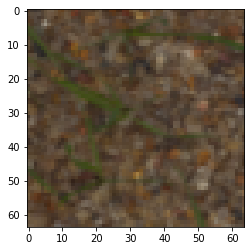

In [21]:
print("The Original Image is shown below, of the test set :")
plt.imshow(x_test[1].reshape(64,64,4))
print("\n\nThe Predicated Label is :",predict_LR[1],"\nOriginal Label is :",y_test[1])


KNN Model Train Score : 0.1303093864708967

KNN Model Test Score : 0.11949685534591195

Confusion Matrix Mapping


<AxesSubplot:>

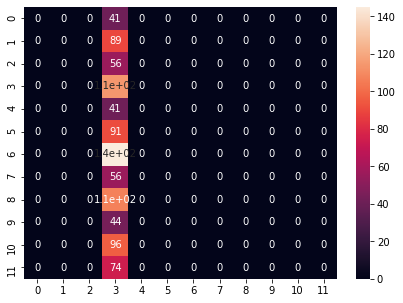

In [22]:
######################################################################
# K Nearest Neighbors
######################################################################
KNN.fit(x_train, y_train)
predict_KNN = KNN.predict(x_test)
####################################################
confusion_KNN=metrics.confusion_matrix(y_test, predict_KNN)
Accuracy_KNN = accuracy_score(y_test, predict_KNN)
Recall_KNN = recall_score(y_test, predict_KNN,average=None)
KNN_Testscore=KNN.score(x_test,y_test)
KNN_Trainscore=KNN.score(x_train,y_train)
####################################################
print("\nKNN Model Train Score :",KNN_Trainscore)
print("\nKNN Model Test Score :",KNN_Testscore)
####################################################
df_confusion_KNN = pd.DataFrame(confusion_KNN)
print("\nConfusion Matrix Mapping")
plt.figure(figsize = (7,5))
sns.heatmap(df_confusion_KNN, annot=True)
######################################################################
# 
######################################################################

The Original Image is shown below, of the test set :


The Predicated Label is : Common Chickweed 
Original Label is : Fat Hen


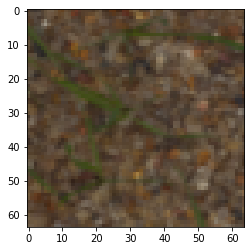

In [23]:
print("The Original Image is shown below, of the test set :")
plt.imshow(x_test[1].reshape(64,64,4))
print("\n\nThe Predicated Label is :",predict_KNN[1],"\nOriginal Label is :",y_test[1])

**Observations** :

If you observe the heatmap it is too much biased around one single point, which is a strong indication that most probably it is stuck in either local maxima/minima or that it has an exploding gradient problem. The former I think is true and hence, is unable to pickup any differences.

But note that two different models have now made two different predictions so far. That is seriously poor machine learning. If we observe the Train and Test score is ridiculously low.


Support Vector Machine Model Test Score : 0.1519916142557652

Support Vector Machine Model Train Score : 0.13791295228106976

Confusion Matrix Mapping


<AxesSubplot:>

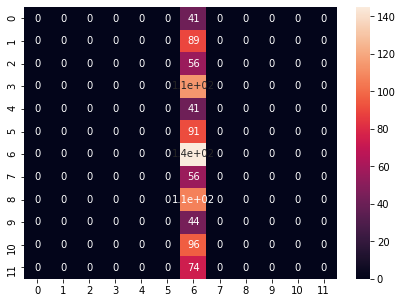

In [24]:
######################################################################
# Support Vector Machine
######################################################################
support_vector.fit(x_train, y_train)
predict_SVM = support_vector.predict(x_test)
####################################################
confusion_SVM=metrics.confusion_matrix(y_test, predict_SVM)
Accuracy_SVM = accuracy_score(y_test, predict_SVM)
Recall_SVM = recall_score(y_test, predict_SVM,average=None)
support_vector_Testscore=support_vector.score(x_test, y_test)
support_vector_Trainscore=support_vector.score(x_train, y_train)
####################################################
print("\nSupport Vector Machine Model Test Score :",support_vector_Testscore)
print("\nSupport Vector Machine Model Train Score :",support_vector_Trainscore)
####################################################
df_confusion_SVM = pd.DataFrame(confusion_SVM)
print("\nConfusion Matrix Mapping")
plt.figure(figsize = (7,5))
sns.heatmap(df_confusion_SVM, annot=True)
######################################################################
# 
######################################################################

The Original Image is shown below, of the test set :


The Predicated Label is : Loose Silky-bent 
Original Label is : Fat Hen


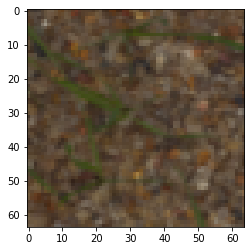

In [25]:
print("The Original Image is shown below, of the test set :")
plt.imshow(x_test[1].reshape(64,64,4))
print("\n\nThe Predicated Label is :",predict_SVM[1],"\nOriginal Label is :",y_test[1])

In [38]:
photos_resized


AttributeError: 'list' object has no attribute 'shape'

In [80]:
x=np.array(photos_resized)
y=np.array(labels2)
x=x.reshape(x.shape[0],-1)

In [81]:
len(np.unique(y))

13

In [82]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Conv2D
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [84]:
x_train = x_train.reshape(x_train.shape[0], 64, 64, 4)[:,:,:,:-1]
x_test = x_test.reshape(x_test.shape[0], 64, 64, 4)[:,:,:,:-1]
#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)
y_train=OneHotEncoder().fit_transform(y_train.reshape(-1,1))
y_test=OneHotEncoder().fit_transform(y_test.reshape(-1,1))

In [85]:
print(y_train[12])

  (0, 3)	1.0


In [89]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 13, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [90]:
x_train.shape

(3814, 64, 64, 3)

In [91]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.1)

# Fit the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/10


TypeError: in user code:

    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        y_pred, y_true = losses_utils.squeeze_or_expand_dimensions(
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\utils\losses_utils.py:136 squeeze_or_expand_dimensions
        y_true, y_pred = remove_squeezable_dimensions(
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\utils\losses_utils.py:66 remove_squeezable_dimensions
        labels = ops.convert_to_tensor_v2_with_dispatch(labels)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\ops.py:1404 convert_to_tensor_v2_with_dispatch
        return convert_to_tensor_v2(
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\ops.py:1410 convert_to_tensor_v2
        return convert_to_tensor(
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\profiler\trace.py:163 wrapped
        return func(*args, **kwargs)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\ops.py:1540 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\constant_op.py:339 _constant_tensor_conversion_function
        return constant(v, dtype=dtype, name=name)
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\constant_op.py:264 constant
        return _constant_impl(value, dtype, shape, name, verify_shape=False,
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\constant_op.py:281 _constant_impl
        tensor_util.make_tensor_proto(
    C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\tensor_util.py:551 make_tensor_proto
        raise TypeError("Failed to convert object of type %s to Tensor. "

    TypeError: Failed to convert object of type <class 'tensorflow.python.framework.sparse_tensor.SparseTensor'> to Tensor. Contents: SparseTensor(indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64), values=Tensor("DeserializeSparse:1", shape=(None,), dtype=float32), dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)). Consider casting elements to a supported type.


In [ ]:
model.evaluate(X_test, y_test)